# Magic functions

You can enable magic functions by loading the extension ``pandas_td.ipython``:

In [1]:
%load_ext pandas_td.ipython

You can load it automatically by adding the following lines in your "~/.ipython/profile_default/ipython_config.py":

In [ ]:
c = get_config()

c.InteractiveShellApp.extensions = [
    'pandas_td.ipython',
]

After loading the extension, type "%td" and press TAB to complete the list of magic functions:

![Image](http://i.gyazo.com/ff9d7c5de1b16a21236fa7fb5d47d5a4.png)

If you are customizing magic functions, you can import ``pandas_td.ipython`` in your own extension:

In [ ]:
# ~/.ipython/extensions/myextension.py

from pandas_td.ipython import magic_databases
from pandas_td.ipython import magic_tables

def load_ipython_extension(ipython):
    # %databases [PATTERN]
    ipython.register_magic_function(magic_databases, magic_kind='line', magic_name='databases')

    # %tables [PATTERN]
    ipython.register_magic_function(magic_tables, magic_kind='line', magic_name='tables')

# List functions

``%td_databases`` returns the list of databases:

In [2]:
%td_databases

,name,count,permission,created_at,updated_at
0,tutorial,19,full_access,2015-05-27 13:12:43+00:00,2015-05-27 13:12:43+00:00
1,sample_datasets,8812278,query_only,2014-10-04 01:13:11+00:00,2015-01-09 01:07:14+00:00


``%td_tables`` returns the list of tables:

In [3]:
%td_tables sample

,db_name,name,count,estimated_storage_size,last_log_timestamp,created_at
0,sample_datasets,nasdaq,8807278,168205061,1970-01-01 00:00:00+00:00,2014-10-08 02:57:38+00:00
1,sample_datasets,www_access,5000,0,2014-10-04 01:13:15+00:00,2014-10-04 01:13:12+00:00


``%td_jobs`` returns the list of recently executed jobs:

In [4]:
%td_jobs

,status,job_id,type,start_at,query
0,success,28870939,presto,2015-07-10 19:37:05+00:00,"-- read_td_table('nasdaq')\nSELECT time, symbo..."
1,success,28870917,presto,2015-07-10 19:36:05+00:00,"-- read_td_table('nasdaq')\nSELECT time, symbo..."
2,success,28870902,presto,2015-07-10 19:35:40+00:00,-- read_td_table('www_access')\nSELECT *\nFROM...


# Use database

``%td_use`` is a special function that has side effects.  First, it pushes table names into the current namespace:

In [5]:
%td_use sample_datasets

INFO: import www_access
INFO: import nasdaq


By printing a table name, you can describe column names:

In [6]:
nasdaq

,field,type,alias
0,symbol,string,
1,open,double,
2,volume,long,
3,high,double,
4,low,double,
5,close,double,


Tab completion is also supported:

![Tab completion](http://i.gyazo.com/fde882bc1bd665ba080cbd72222e27cb.png)

The second effect of ``%td_use`` is that it declares the "default database".  The default database is used when you run queries without specifying a database in the following query functions.

# Query functions

``%%td_hive``, ``%%td_pig``, and ``%%td_presto`` are cell magic functions that run queries:

In [7]:
%%td_presto
select count(1) cnt
from nasdaq

,cnt
0,8807278


The result of the query can be stored in a variable as follows for further processing:

In [8]:
df = _

There is another family of functions ``%%td_hive_plot``, ``%%td_pig_plot``, and ``%%td_presto_plot`` that apply ``plot()`` method immediately after running a query.

In [9]:
%matplotlib inline

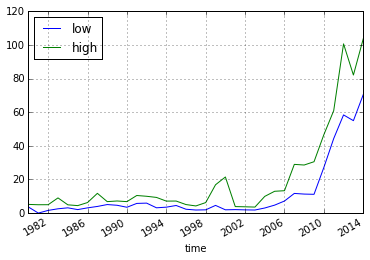

In [10]:
%%td_presto_plot
select
  -- Note: the first column must be unixtime named 'time'
  td_date_trunc('year', time) time,
  min(low) low,
  max(high) high
from
  nasdaq
where
  symbol = 'AAPL'
group by
  1